### Ch7 Figure3

In [1]:
# I once worked with a graduate school that was trying to increase their enrollment by looking at past data. It turned out that the best idea came from a project manager who was also an avid scuba diver. He looked at the demographic data and suggested that a buddy system might increase the students who went through the whole program. That was common practice in scuba training.

buddy = ['yes', 'no']

data = []

for i in range(1000):
    has_buddy = buddy[rd.randint(0,1)]
    if has_buddy == 'yes':
        if rd.random() >= .3:
            dur = rd.randint(4,12)
        else:
            dur = rd.randint(0,12)
    else:
        if rd.random() <= .6:
            dur = rd.randint(0,7)
        else:
            dur = rd.randint(0,12)
    
    data.append([i, has_buddy, dur])
    
df = pd.DataFrame(data, columns = ['id', 'has_buddy', 'weeks-in-program'])
# df.to_csv('csv_output/ch7_fig3.csv', index=False)
df = pd.read_csv('csv_output/ch7_fig3.csv')
df.head()

,id,has_buddy,weeks-in-program
0,0,yes,7
1,1,no,4
2,2,yes,11
3,3,no,2
4,4,yes,11


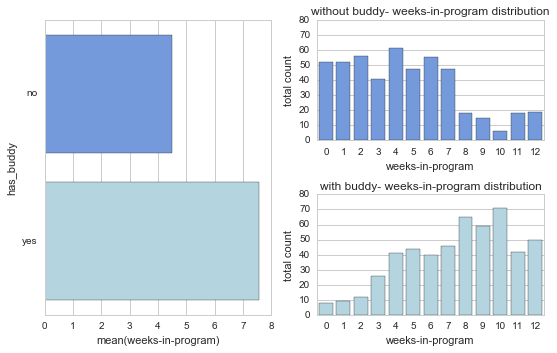

In [2]:
df = pd.read_csv('csv_output/ch7_fig3.csv')

%matplotlib inline
sns.set_style("whitegrid")

f, ax = plt.subplots(2,2, figsize=(8,5))

ax1 = plt.subplot2grid((2,2),(0,0), rowspan=2)

ds = df.groupby('has_buddy')['weeks-in-program'].mean().reset_index()
sns.barplot(y='has_buddy', x='weeks-in-program', data=ds, ax=ax1, palette=['cornflowerblue', 'lightblue']);


ds2 = df.groupby(['has_buddy', 'weeks-in-program']).id.count()
ds2_no = ds2['no'].reset_index()
ds2_yes = ds2['yes'].reset_index()

sns.barplot(x='weeks-in-program', y='id', data=ds2_no, ax=ax[0][1], color='cornflowerblue')
sns.barplot(x='weeks-in-program', y='id', data=ds2_yes, ax=ax[1][1], color='lightblue')

ax[0][1].set_ylim(0,80)
ax[0][1].set_ylabel('total count')
ax[1][1].set_ylabel('total count')
ax[0][1].set_title('without buddy- weeks-in-program distribution')
ax[1][1].set_title('with buddy- weeks-in-program distribution')

f.tight_layout()
f.savefig('svg_output/ch7_fig3.svg', format='svg')

Looking at the left, if a student participats in their buddy program, averagely they will stay 3 more weeks longer in the program than those who did not. The distribution of those who has a buddy are more likely to stick around after8 weeks than those who did not.

In [3]:
%load_ext rpy2.ipython

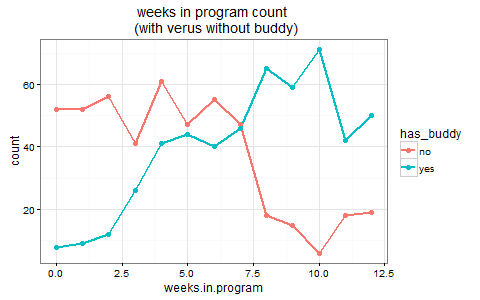

In [4]:
%%R -w 480 -h 300 -u px
require(dplyr)

df = read.csv('csv_output/ch7_fig3.csv')
dgb = df %>% group_by(weeks.in.program, has_buddy)
df2 = summarize(dgb, count=n())

require(ggplot2)
ggplot(df2, aes(x=weeks.in.program, y=count, colour=has_buddy)) + geom_line(size=1) + geom_point(size=2) + ggtitle('weeks in program count \n (with verus without buddy)') + theme_bw()
# ggsave("svg_output/ch7_fig3_R.svg")